# Praca domowa 6
**Mateusz Madej 313496**

## Wczytanie odpowiednich bibliotek i ramki danych:

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Wstęp i opis danych: 
W mojej pracy domowej zajmę się analizą ramki danych mushrooms ze strony https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download. 
Zbiór ten opisuje hipotetyczne próbki 23 gatunków grzybów blaszkowych. Oprócz opisów parametrów, każdy gatunek został sklasyfikowany jako jadalnylub trujący.
Ramka danych opisuje 8124 próbki o 23 właściwościach opisywanych kolejnymi kolumnami:
- class - jadalne/niejadalne
- cap-shape - kształt kapelusza
- cap-surface - tekstura powierzchni kapelusza
- cap-color - kolor kapelusza
- bruises - obecność siniaków
- odor - zapach
- gill-attachment - typ mocowania blaszki
- gill-spacing - odległość między blaszkami
- gill-size - wielkość blaszki
- gill-color - kolor blaszki
- stalk-shape - krztałt trzona
- stalk-root - typ korzenia
- stalk-surface-above-ring - typ powierzchni trzonu nad pierścieniem
- stalk-surface-below-ring - typ powierzchni trzonu pod pierścieniem
- veil-type - typ pochwy
- veil-color - kolor pochwy
- ring-number - liczba pierścieni
- ring-type - typ pierścienia
- spore-print-color - kolor zarodników
- population - liczność występowania
- habitat - miejsce występowania




   ## Tablica ze statystykami ramki:

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Badanie rozkładów wybranych zmiennych

### Badanie rozkładu zmiennej class: <br/>
   

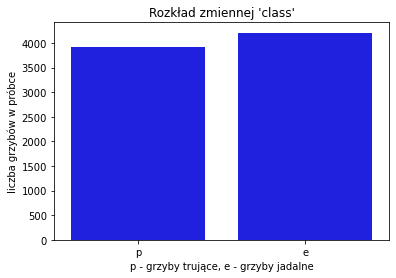

In [39]:
sns.countplot(data = df, x = df['class'], color = "blue")
plt.xlabel('p - grzyby trujące, e - grzyby jadalne')
plt.ylabel('liczba grzybów w próbce')
plt.title("Rozkład zmiennej 'class'", loc = "Center")
plt.show()

 Zauważmy, że grzybów jadalnych w naszej próbce jest minimalnie więcej niż grzybów trujących, ale generalnie jest ich porównywalna ilość.
 


### Badanie rozkładu zmiennej cap-color: <br/>
    Legenda kolorów:
    n - brown,
    b - buff,
    c - cinnamon,
    g - gray,
    r - green,
    p - pink,
    u - purple,
    e - red,
    w - white,
    y - yellow
    
    
 

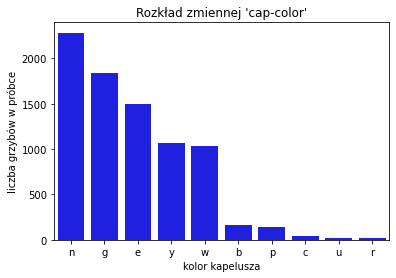

In [78]:
sns.countplot(data = df, x = df['cap-color'], color = "blue", order = "ngeywbpcur")
plt.xlabel('kolor kapelusza')
plt.ylabel('liczba grzybów w próbce')
plt.title("Rozkład zmiennej 'cap-color'", loc = "Center")
plt.show()

Zauważmy, że zdecydowana większość grzybów w próbce ma kapelusze koloru bronzowego, szarego, czerwonego, żółtego, lub białego.

### Badanie rozkładu zmiennej habitat:
    Legenda oznaczeń:
    g - grasses,
    l - leaves,
    m - meadows,
    p - paths,
    u - urban,
    w - waste,
    d - woods
    

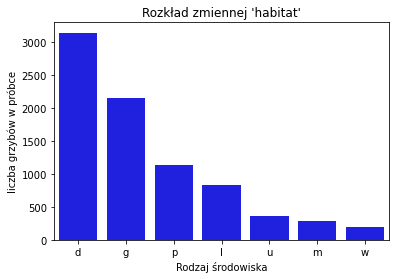

In [46]:
sns.countplot(data = df, x = df['habitat'], color = "blue", order = "dgplumw")
plt.xlabel('miejsce występowania')
plt.ylabel('liczba grzybów w próbce')
plt.title("Rozkład zmiennej 'habitat'", loc = "Center")
plt.show()

Najwięcej grzybów z naszej próbki występuje w lasach i trawach.

## Zależności między zmiennymi

### Zależność między kolorem kapelusza a clasą (jadalny/trujący)
    Legenda kolorów:
    n - brown,
    b - buff,
    c - cinnamon,
    g - gray,
    r - green,
    p - pink,
    u - purple,
    e - red,
    w - white,
    y - yellow

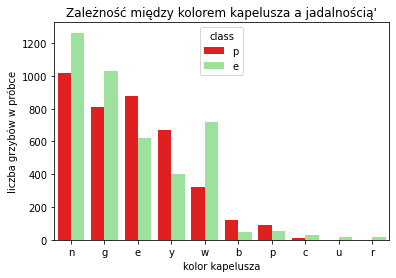

In [82]:
sns.countplot(data = df, x = df['cap-color'],order = "ngeywbpcur", hue = df["class"], palette = ["red","Lightgreen"])
plt.xlabel('kolor kapelusza')
plt.ylabel('liczba grzybów w próbce')
plt.title("Zależność między kolorem kapelusza a jadalnością'", loc = "Center")
plt.show()

Możemy zauważyć, że kolor kapelusza jest dosyć słabą poszlaką w rozróżnianiu jadalności grzybów, aczkolwiek np wśród grzybów o białych kapeluszach było dwa razy więcej jadalnych niż trujących, a wśród grzybów o żółtych kapeluszach grzybów trujących było o ok połowę więcej niż jadalnych.

## Zależność między zapachem, a jadalnością grzyba
    Legenda oznaczeń zapachów:
    a - almond,
    l - anise,
    c - creosote,
    y - fishy,
    f - foul,
    m - musty,
    p - pungent,
    s - spicy,
    n - none

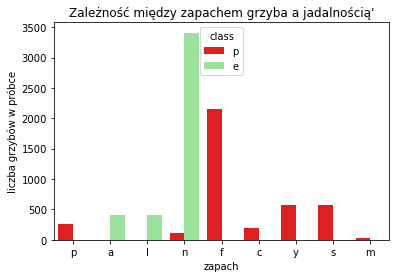

In [80]:
sns.countplot(data = df, x = df['odor'], hue = df["class"], palette = ["red","Lightgreen"])
plt.xlabel('zapach')
plt.ylabel('liczba grzybów w próbce')
plt.title("Zależność między zapachem grzyba a jadalnością'", loc = "Center")
plt.show()

Z naszych danych wynika że sugerowanie się zapachem przy rozróżnianiu grzybów jadalnych i trujących może być całkiem niezłym pomysłem. Zapachy almond, anise lub całkowity brak zapachu są typowe dla grzybów jadalnych, a reszta z opisanych jest typowa dla grzybów trujących.

## Podsumowanie
    - w naszej próbce mieliśmy porównywalną liczbę grzybów trujących i jadalnych
    - kolor kapelusza jest słabym kryterium przy rozróżnianiu jadalności grzybów
    - za to ich zapach okazuje się bardzo dobrym kryterium

## Wnioski o danych (z przymrużeniem oka ;p)
    - Dane jakościowe są o wiele trudniejsze w analizie i wizualizacji od danych liczbowych
    - Tłumaczenie specjalistycznych nazw takich jak zapachy, czy inne parametry budowy grzyba na język polski bez zaplecza  merytorycznego jest dość trudnym zadaniem
    